# Import

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Evaluate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Facebook Prophet model
from fbprophet import Prophet

# To avoid warning messages
import warnings
warnings.filterwarnings("ignore")

Importing plotly failed. Interactive plots will not work.


# Dataset

In [2]:
# Bitcoin dataset 2021-02-16/2022-02-16
df = pd.read_csv("./BTC-USD.csv", parse_dates=['Date'], index_col=["Date"])

In [3]:
df_prophet = df.reset_index()

In [4]:
df_prophet = df_prophet[["Date","Close"]]

In [5]:
df_p = df_prophet.rename(columns={"Date":"ds","Close":"y"})

In [6]:
train_p = df_p[:257]
test_p = df_p[257:]

# Prophet

## Preprocessing

In [7]:
df_prophet = df.reset_index()

In [8]:
df_prophet = df_prophet[["Date","Close"]]

In [9]:
df_p = df_prophet.rename(columns={"Date":"ds","Close":"y"})

In [10]:
train_p = df_p[:257]
test_p = df_p[257:]

## Model

In [11]:
# Prophet is able to capture daily, weekly, yearly seasonality.
model = Prophet(interval_width=0.95, daily_seasonality=True, yearly_seasonality=True)

In [12]:
model.fit(train_p)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [13]:
test_future = model.make_future_dataframe(periods=len(test_p))

In [14]:
pred_p = model.predict(test_future)

In [15]:
pred_p

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-16,48308.415266,49523.086914,59398.126975,48308.415266,48308.415266,6169.911923,6169.911923,6169.911923,-3413.799524,...,-425.929737,-425.929737,-425.929737,10009.641184,10009.641184,10009.641184,0.0,0.0,0.0,54478.327189
1,2021-02-17,48341.962895,48584.512595,58490.812061,48341.962895,48341.962895,5326.388410,5326.388410,5326.388410,-3413.799524,...,-80.918140,-80.918140,-80.918140,8821.106074,8821.106074,8821.106074,0.0,0.0,0.0,53668.351305
2,2021-02-18,48375.510525,47633.601961,57750.130272,48375.510525,48375.510525,4143.729840,4143.729840,4143.729840,-3413.799524,...,-208.118915,-208.118915,-208.118915,7765.648278,7765.648278,7765.648278,0.0,0.0,0.0,52519.240364
3,2021-02-19,48409.058154,47087.785239,57220.778670,48409.058154,48409.058154,3690.192441,3690.192441,3690.192441,-3413.799524,...,255.925504,255.925504,255.925504,6848.066462,6848.066462,6848.066462,0.0,0.0,0.0,52099.250595
4,2021-02-20,48442.605783,46339.779496,56411.555187,48442.605783,48442.605783,2914.066595,2914.066595,2914.066595,-3413.799524,...,257.512289,257.512289,257.512289,6070.353830,6070.353830,6070.353830,0.0,0.0,0.0,51356.672378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2022-02-12,60791.681959,68664.375315,78583.629351,60758.383330,60826.380817,13152.776551,13152.776551,13152.776551,-3413.799524,...,257.512289,257.512289,257.512289,16309.063786,16309.063786,16309.063786,0.0,0.0,0.0,73944.458510
362,2022-02-13,60826.849467,67630.438160,77175.248853,60793.222897,60862.001816,11439.905944,11439.905944,11439.905944,-3413.799524,...,176.183753,176.183753,176.183753,14677.521716,14677.521716,14677.521716,0.0,0.0,0.0,72266.755411
363,2022-02-14,60862.016976,65869.318705,75306.437927,60828.062464,60897.622326,9737.027582,9737.027582,9737.027582,-3413.799524,...,25.345246,25.345246,25.345246,13125.481860,13125.481860,13125.481860,0.0,0.0,0.0,70599.044557
364,2022-02-15,60897.184484,64036.540852,73611.651945,60862.747747,60933.242837,7830.652998,7830.652998,7830.652998,-3413.799524,...,-425.929737,-425.929737,-425.929737,11670.382258,11670.382258,11670.382258,0.0,0.0,0.0,68727.837481


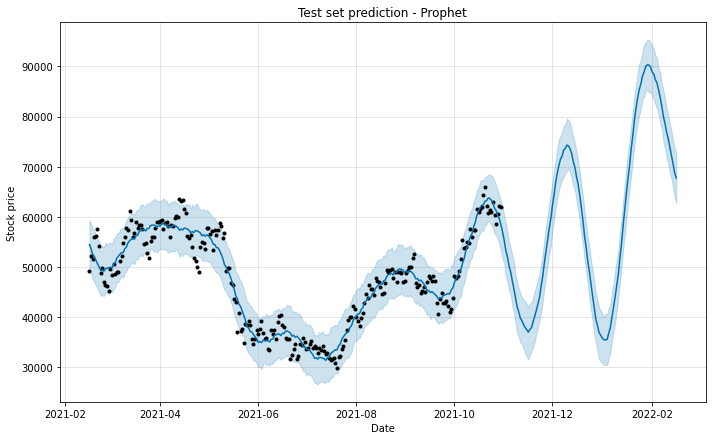

In [16]:
model.plot(pred_p);
plt.title("Test set prediction - Prophet")
plt.ylabel("Stock price")
plt.xlabel("Date")

plt.show()

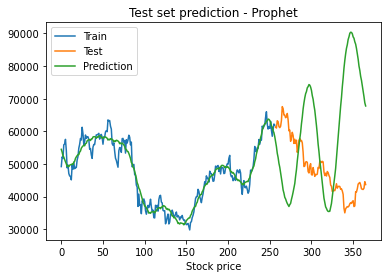

In [17]:
# Comparing the real values with the predicition

plt.plot(train_p["y"], label="Train")
plt.plot(test_p["y"],label="Test")
plt.plot(pred_p["yhat"], label="Prediction")

plt.title("Test set prediction - Prophet")
plt.xlabel("Date")
plt.xlabel("Stock price")

plt.legend()

plt.show()

## Evaluate - RMSE, MAPE

In [18]:
y_pred = pred_p["yhat"][257:]

In [19]:
rmse_p = np.sqrt(mean_squared_error(test_p["y"], y_pred))

In [20]:
mape_p = mean_absolute_percentage_error(test_p["y"], y_pred)

In [21]:
rmse_p

26102.748390907473

In [22]:
mape_p

0.47988129597906504

# Forecast

In [23]:
model = Prophet(interval_width=0.95, daily_seasonality=True, yearly_seasonality=True)
model.fit(df_p)

final_fut = model.make_future_dataframe(periods=50)

final_pred_p = model.predict(final_fut)

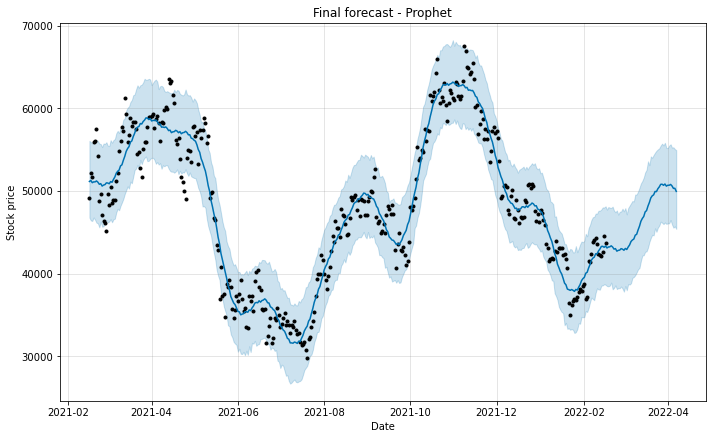

In [24]:
model.plot(final_pred_p);
plt.title("Final forecast - Prophet")
plt.ylabel("Stock price")
plt.xlabel("Date")

plt.show()